Ramas, Ron Patrick G. - 23102078

# **Assignment in Data Analytics**

---

### **Import Libraries**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kaleido
from IPython.display import Image
import networkx as nx

### **Horizontal Stacked Bar Plot**

In [3]:
bar_df = pd.read_csv("data/bar_assignment.csv")
bar_df.tail()

,LABEL,COUNT
17,S,0
18,S,0
19,S,0
20,S,1
21,S,0


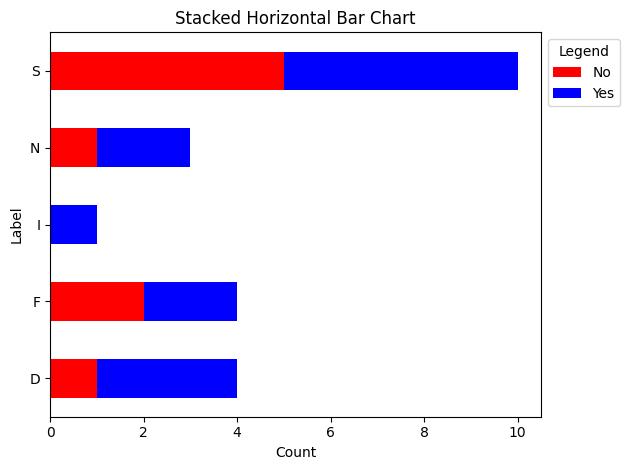

In [4]:
bar_df.columns = bar_df.columns.str.strip()

bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})

plot_data = bar_df.groupby(["LABEL", "COUNT"]).size().unstack(fill_value=0)

plot_data.plot(kind="barh", stacked=True, color=["red", "blue"])
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Stacked Horizontal Bar Chart")
plt.legend(title="Legend", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## **Sankey Plot**

In [5]:
sankey_df = pd.read_csv('data/sankey_assignment.csv')
sankey_df.tail()

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


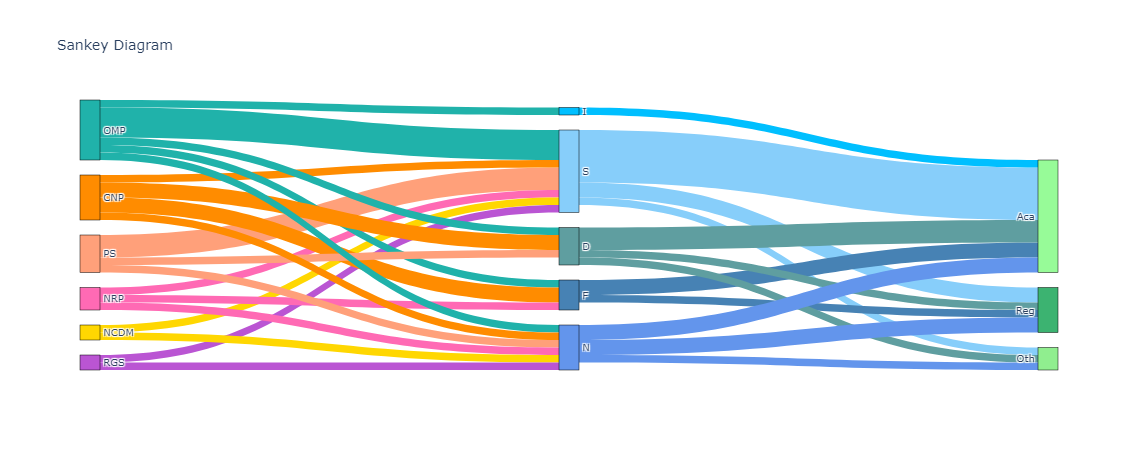

In [ ]:
def find_distance_sankey(mid, target):
    global sankey_df
    return sankey_df.loc[sankey_df['LABEL'] == mid, target].values[0]
start = list(sankey_df.columns[1:9])
middle = list(sankey_df['LABEL'].unique())
end = list(sankey_df.columns[9:])

labels = start + middle + end

source = []
target = []
value = []

node_indices = {x: i for i, x in enumerate(labels)}

for s in start:
    for m in middle:
        dist = find_distance_sankey(m, s)
        
        if dist > 0:
            source.append(node_indices[s])
            target.append(node_indices[m])
            value.append(dist)

for e in end:
    for m in middle:
        dist = find_distance_sankey(m, e)
        
        if dist > 0:
            source.append(node_indices[m])
            target.append(node_indices[e])
            value.append(dist)

colors = ['#FFA07A', '#20B2AA', '#FF8C00', '#FF6AB4', '#8FBC8F', 
        '#02CED1', '#FFD701', '#BA55D3', '#87CEFA', '#4782B4',
        '#5F9EA0', '#6395EC', '#00BFFF', '#3CB371', '#97FB98', 
        '#90EE8F' ]

link_colors = [colors[src] for src in source]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors
    )
))

fig.update_layout(title_text="Sankey Diagram", font_size=10)
# fig.show()

Image("./assets/sankey_diagram.png")